In [2]:
!nvidia-smi

Wed Jun  4 18:16:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   73C    P0             18W /   50W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, Xception, InceptionV3, ResNet50, DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#### Load and Preprocess Dataset ###

# Define data directories
train_dir = "Dataset/train"
test_dir = "Dataset/test"

# Define image size
img_size = (224, 224)

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size, #224x224
    class_mode="categorical",
    batch_size=100
)

# Load and preprocess test data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size, #224x224
    class_mode="categorical",
    batch_size=100
)
#####

### Load Pre-trained InceptionV3 Model ###
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(img_size[0], img_size[1], 3))
#####

###  Add Custom Layers ###
# Build transfer learning model 
model5 = Sequential()
model5.add(base_model)
model5.add(GlobalAveragePooling2D())
model5.add(Dense(100, activation="relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(100, activation="relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(3, activation="softmax"))

#####

### Freeze the pre-trained layers ###
for layer in base_model.layers:
    layer.trainable = False
####

### Compile the model ###
optimizer = Adam(learning_rate=0.001)
model5.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
####

# Early stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5
)


###  Train the Model ###
history100 = model5.fit(train_data, epochs=50, validation_data=test_data, callbacks=[early_stop])
####

### Evaluate the model ###
loss, accuracy = model5.evaluate(test_data)
accuracy_percentage = accuracy * 100
print("Test loss:", loss)
print("Test accuracy:", accuracy_percentage)

Found 911 images belonging to 3 classes.
Found 306 images belonging to 3 classes.
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step - accuracy: 0.4537 - loss: 1.6383 - val_accuracy: 0.6699 - val_loss: 0.7493
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.5873 - loss: 1.0343 - val_accuracy: 0.6797 - val_loss: 0.6312
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 67s 6s/step - accuracy: 0.5957 - loss: 1.0045 - val_accuracy: 0.7026 - val_loss: 0.6324
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.6953 - loss: 0.7570 - val_accuracy: 0.7908 - val_loss: 0.4960
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 7s/step - accuracy: 0.6899 - loss: 0.7269 - val_accuracy: 0.8007 - val_loss: 0.4584
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.7001 - loss: 0.7524 - val_accuracy: 0.8039 - val_loss: 0.4558
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.7389 - loss: 0.6022 - val_accuracy: 0.8170 - val_loss: 0.4079
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The Mushroom image classification is: Boletus


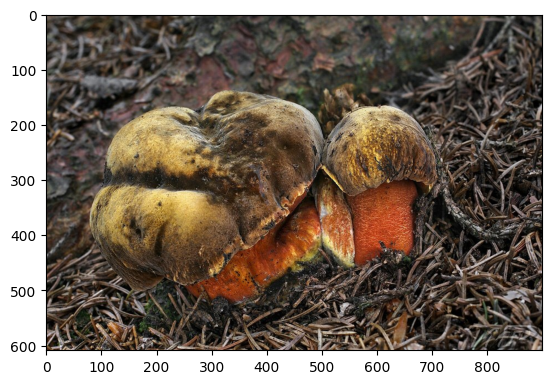

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

def predict(input_model):
  given_image = plt.imread(input_model)
  plt.imshow(given_image)
  inputImage = image.load_img(input_model, target_size=(224, 224))  # Adjust the target_size to (224, 224)
  inputImage = image.img_to_array(inputImage)
  inputImage = np.expand_dims(inputImage, axis=0)
  inputImage = inputImage / 255.0
  prediction = model5.predict(inputImage)
  predicted_class_index = np.argmax(prediction)
  class_names = list(train_data.class_indices.keys())
  predicted_class = class_names[predicted_class_index]
  print("The Mushroom image classification is:", predicted_class)

predict("Dataset/test/Boletus/0411_lm5CdpdZXbc.jpg")


In [7]:
model5.save("Mushroom Classification Model 88.h5")

In [8]:
print(list(train_data.class_indices.keys()))

['Boletus', 'Lactarius', 'Russula']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
The Mushroom image classification is: Russula


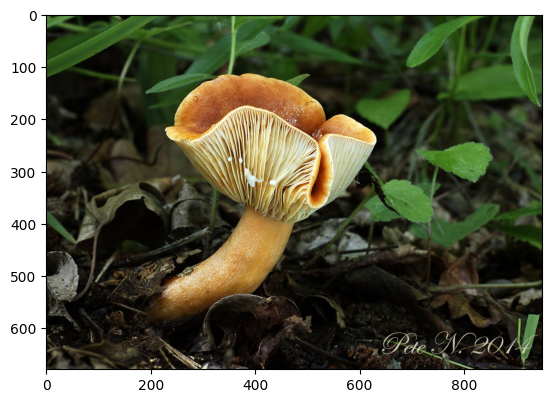

In [10]:
predict("Dataset/train/Lactarius/0007_IPF2Tc5Pk3o.jpg")